In [2]:
# Imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import statsmodels.formula.api as smf 

from scipy.interpolate import interp1d
import seaborn.objects as so
from sklearn.preprocessing import StandardScaler
import matplotlib.ticker as mtick

In [3]:
cancellations_england_fp = os.path.join(os.getcwd(), "datasets", "nhsenglandcancellation.xlsx")
cancellations_england = pd.read_excel(cancellations_england_fp)

In [4]:
cancellations_england.drop(columns=["Unnamed: 0","Patients not treated within 28 days of cancellation.","Patients not treated within 28 days of cancellation as percentage of cancellations"], inplace=True)

In [5]:
cancellations_england

,Year,Quarter,Number of cancelled elective operations,Elective \nadmissions,Cancelled operations as percentage of elective admissions
0,1994/95,1,11603.0,1.054818e+06,0.011000
1,1994/95,2,10186.0,1.131778e+06,0.009000
2,1994/95,3,11874.0,1.187400e+06,0.010000
3,1994/95,4,14466.0,1.205500e+06,0.012000
4,1995/96,1,11860.0,1.186000e+06,0.010000
...,...,...,...,...,...
114,2022/23,3,21273.0,1.904705e+06,0.011168
115,2022/23,4,18975.0,1.987581e+06,0.009546
116,2023/24,1,17024.0,1.948942e+06,0.008734
117,2023/24,2,18749.0,1.990449e+06,0.009419


In [6]:
cancellations_england.isna().count()
# so all every cell have a data

Year                                                         119
Quarter                                                      119
Number of cancelled elective operations                      119
Elective \nadmissions                                        119
Cancelled operations as percentage of elective admissions    119
dtype: int64

In [7]:
# delete rows before the year 2014/2015
cancellations_england = cancellations_england[cancellations_england["Year"] >= "2014/2015"]

In [8]:
cancellations_england

,Year,Quarter,Number of cancelled elective operations,Elective \nadmissions,Cancelled operations as percentage of elective admissions
84,2015/16,1,16099.0,1915905.0,0.008403
85,2015/16,2,16414.0,1968406.0,0.008339
86,2015/16,3,18393.0,1966783.0,0.009352
87,2015/16,4,23352.0,1925765.0,0.012126
88,2016/17,1,18730.0,1980104.0,0.009459
89,2016/17,2,19446.0,1994782.0,0.009748
90,2016/17,3,21247.0,1964809.0,0.010814
91,2016/17,4,21219.0,1997774.0,0.010621
92,2017/18,1,18752.0,1947534.0,0.009629
93,2017/18,2,18587.0,1972311.0,0.009424


In [9]:
cancellations_england.dropna(inplace=True)

/var/folders/16/jctzkwyn5k5gvk9tx998xk8h0000gn/T/ipykernel_6043/3298335070.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cancellations_england.dropna(inplace=True)


In [10]:
cancellations_scotland_fp = os.path.join(os.getcwd(), "datasets", "cancellations_in_scotland.csv")
cancellations_scotland = pd.read_csv(cancellations_scotland_fp)

In [11]:
cancellations_scotland

,_id,Month,Country,TotalOperations,TotalOperationsQF,TotalCancelled,TotalCancelledQF,CancelledByPatientReason,CancelledByPatientReasonQF,ClinicalReason,ClinicalReasonQF,NonClinicalCapacityReason,NonClinicalCapacityReasonQF,OtherReason,OtherReasonQF
0,1,201505,S92000003,28810,NaN,2695,NaN,1057,NaN,853,NaN,523,NaN,262,NaN
1,2,201506,S92000003,30941,NaN,2800,NaN,1194,NaN,870,NaN,449,NaN,287,NaN
2,3,201507,S92000003,27725,NaN,2642,NaN,1083,NaN,854,NaN,457,NaN,248,NaN
3,4,201508,S92000003,28948,NaN,2630,NaN,1080,NaN,912,NaN,491,NaN,147,NaN
4,5,201509,S92000003,30938,NaN,2829,NaN,1122,NaN,1000,NaN,535,NaN,172,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,101,202309,S92000003,23209,NaN,2105,NaN,739,NaN,738,NaN,541,NaN,87,NaN
101,102,202310,S92000003,24201,NaN,2286,NaN,775,NaN,797,NaN,580,NaN,134,NaN
102,103,202311,S92000003,25922,NaN,2277,NaN,737,NaN,820,NaN,582,NaN,138,NaN
103,104,202312,S92000003,20837,NaN,2014,NaN,677,NaN,725,NaN,515,NaN,97,NaN


In [12]:
cancellations_scotland["Month"] = pd.to_datetime(cancellations_scotland.Month, format="%Y%m")


In [13]:
cancellations_scotland.drop(columns=["Country","_id","TotalOperationsQF","TotalCancelledQF","CancelledByPatientReasonQF","ClinicalReasonQF","NonClinicalCapacityReasonQF","OtherReasonQF"], inplace=True)

In [14]:
cancellations_scotland.rename(columns={"Month":"Date"}, inplace=True)

In [15]:
cancellations_scotland

,Date,TotalOperations,TotalCancelled,CancelledByPatientReason,ClinicalReason,NonClinicalCapacityReason,OtherReason
0,2015-05-01,28810,2695,1057,853,523,262
1,2015-06-01,30941,2800,1194,870,449,287
2,2015-07-01,27725,2642,1083,854,457,248
3,2015-08-01,28948,2630,1080,912,491,147
4,2015-09-01,30938,2829,1122,1000,535,172
...,...,...,...,...,...,...,...
100,2023-09-01,23209,2105,739,738,541,87
101,2023-10-01,24201,2286,775,797,580,134
102,2023-11-01,25922,2277,737,820,582,138
103,2023-12-01,20837,2014,677,725,515,97


In [16]:
cancellations_england.groupby("Year").sum()

,Quarter,Number of cancelled elective operations,Elective \nadmissions,Cancelled operations as percentage of elective admissions
Year,,,,
2015/16,10,74258.0,7776859.0,0.038219
2016/17,10,80642.0,7937469.0,0.040643
2017/18,10,84825.0,7815261.0,0.043460
2018/19,10,79470.0,7892709.0,0.040251
2019/20,6,64433.0,6081791.0,0.031769
2021/22,7,36867.0,3496407.0,0.021090
2022/23,10,77266.0,7588216.0,0.040733
2023/24,6,56145.0,5914899.0,0.028465


In [17]:
def get_quarter(date):
    if date.month <= 3:
        return 4
    elif date.month <= 6:
        return 1
    elif date.month <= 9:
        return 2
    else:
        return 3
    
def get_year(date):
    month = date.month
    year = date.year
    year_before = date.year - 1
    year_after = date.year + 1
    this = f"{year}/{year_after - 2000}"
    that = f"{year_before}/{year - 2000}"
    
    if month <= 3:
        return that
    else:
        return this

cancellations_scotland["Year"] = cancellations_scotland["Date"].apply(get_year)
cancellations_scotland["Quarter"] = cancellations_scotland["Date"].apply(get_quarter)

In [18]:
pd.set_option('display.max_rows', None)
cancellations_scotland

,Date,TotalOperations,TotalCancelled,CancelledByPatientReason,ClinicalReason,NonClinicalCapacityReason,OtherReason,Year,Quarter
0,2015-05-01,28810,2695,1057,853,523,262,2015/16,1
1,2015-06-01,30941,2800,1194,870,449,287,2015/16,1
2,2015-07-01,27725,2642,1083,854,457,248,2015/16,2
3,2015-08-01,28948,2630,1080,912,491,147,2015/16,2
4,2015-09-01,30938,2829,1122,1000,535,172,2015/16,2
5,2015-10-01,31487,3050,1198,1075,582,195,2015/16,3
6,2015-11-01,31739,3062,1265,1062,582,153,2015/16,3
7,2015-12-01,29706,2921,1211,963,619,128,2015/16,3
8,2016-01-01,28746,3197,1198,1005,868,126,2015/16,4
9,2016-02-01,31177,3225,1234,1087,762,142,2015/16,4


In [19]:
cancellations_england

,Year,Quarter,Number of cancelled elective operations,Elective \nadmissions,Cancelled operations as percentage of elective admissions
84,2015/16,1,16099.0,1915905.0,0.008403
85,2015/16,2,16414.0,1968406.0,0.008339
86,2015/16,3,18393.0,1966783.0,0.009352
87,2015/16,4,23352.0,1925765.0,0.012126
88,2016/17,1,18730.0,1980104.0,0.009459
89,2016/17,2,19446.0,1994782.0,0.009748
90,2016/17,3,21247.0,1964809.0,0.010814
91,2016/17,4,21219.0,1997774.0,0.010621
92,2017/18,1,18752.0,1947534.0,0.009629
93,2017/18,2,18587.0,1972311.0,0.009424


In [20]:
# drop the rows
to_drop = cancellations_england[((cancellations_england["Year"] == "2015/16") & (cancellations_england["Quarter"] == 1))].index
to_drop1 = cancellations_scotland[((cancellations_scotland["Year"] == "2019/20") | (cancellations_scotland["Year"] == "2020/21") | (cancellations_scotland["Year"] == "2021/22"))].index
to_drop2 = cancellations_england[((cancellations_england["Year"] == "2019/20") | (cancellations_england["Year"] == "2020/21") | (cancellations_england["Year"] == "2021/22"))].index

In [21]:
cancellations_england.drop(to_drop, inplace=True)
cancellations_england.drop(to_drop2, inplace=True)

/var/folders/16/jctzkwyn5k5gvk9tx998xk8h0000gn/T/ipykernel_6043/3312540747.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cancellations_england.drop(to_drop, inplace=True)
/var/folders/16/jctzkwyn5k5gvk9tx998xk8h0000gn/T/ipykernel_6043/3312540747.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cancellations_england.drop(to_drop2, inplace=True)


In [22]:
cancellations_england

,Year,Quarter,Number of cancelled elective operations,Elective \nadmissions,Cancelled operations as percentage of elective admissions
85,2015/16,2,16414.0,1968406.0,0.008339
86,2015/16,3,18393.0,1966783.0,0.009352
87,2015/16,4,23352.0,1925765.0,0.012126
88,2016/17,1,18730.0,1980104.0,0.009459
89,2016/17,2,19446.0,1994782.0,0.009748
90,2016/17,3,21247.0,1964809.0,0.010814
91,2016/17,4,21219.0,1997774.0,0.010621
92,2017/18,1,18752.0,1947534.0,0.009629
93,2017/18,2,18587.0,1972311.0,0.009424
94,2017/18,3,21984.0,1972168.0,0.011147


In [23]:
cancellations_scotland.drop(to_drop1, inplace=True)

In [24]:
cancellations_scotland.drop([0,1,104], inplace=True)

In [25]:
cancellations_scotland

,Date,TotalOperations,TotalCancelled,CancelledByPatientReason,ClinicalReason,NonClinicalCapacityReason,OtherReason,Year,Quarter
2,2015-07-01,27725,2642,1083,854,457,248,2015/16,2
3,2015-08-01,28948,2630,1080,912,491,147,2015/16,2
4,2015-09-01,30938,2829,1122,1000,535,172,2015/16,2
5,2015-10-01,31487,3050,1198,1075,582,195,2015/16,3
6,2015-11-01,31739,3062,1265,1062,582,153,2015/16,3
7,2015-12-01,29706,2921,1211,963,619,128,2015/16,3
8,2016-01-01,28746,3197,1198,1005,868,126,2015/16,4
9,2016-02-01,31177,3225,1234,1087,762,142,2015/16,4
10,2016-03-01,32113,3232,1310,1049,732,141,2015/16,4
11,2016-04-01,29754,2807,1164,1009,505,129,2016/17,1


In [26]:
grouped_scotland = cancellations_scotland.groupby("Year").sum()
grouped_scotland.reset_index(inplace=True)
grouped_scotland

/var/folders/16/jctzkwyn5k5gvk9tx998xk8h0000gn/T/ipykernel_6043/3556323735.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_scotland = cancellations_scotland.groupby("Year").sum()


,Year,TotalOperations,TotalCancelled,CancelledByPatientReason,ClinicalReason,NonClinicalCapacityReason,OtherReason,Quarter
0,2015/16,272579,26788,10701,9007,5628,1452,27
1,2016/17,354601,33098,12842,11601,7288,1367,30
2,2017/18,335101,32348,11884,10919,8124,1421,30
3,2018/19,340523,29967,11108,10873,6793,1193,30
4,2022/23,262879,24835,8485,8390,6785,1172,30
5,2023/24,210494,18595,6550,6623,4533,889,18


In [27]:
grouped_england = cancellations_england.groupby("Year").sum()
grouped_england.reset_index(inplace=True)
grouped_england.rename(columns={"Number of cancelled elective operations":"TotalCancelled", "Elective \nadmissions" : "TotalOperations"}, inplace=True)
grouped_england

,Year,Quarter,TotalCancelled,TotalOperations,Cancelled operations as percentage of elective admissions
0,2015/16,9,58159.0,5860954.0,0.029817
1,2016/17,10,80642.0,7937469.0,0.040643
2,2017/18,10,84825.0,7815261.0,0.043460
3,2018/19,10,79470.0,7892709.0,0.040251
4,2022/23,10,77266.0,7588216.0,0.040733
5,2023/24,6,56145.0,5914899.0,0.028465


In [28]:
merged_countries = pd.merge(grouped_england, grouped_scotland[["NonClinicalCapacityReason","TotalOperations","Year"]], on="Year", suffixes=("_england","_scotland"))
cancellations_england.rename(columns={"TotalCancelled": "NonClinicalCapacityReason"}, inplace=True)
grouped_england.rename(columns={"TotalCancelled": "NonClinicalCapacityReason"}, inplace=True)
concatenated = pd.concat([grouped_england.assign(Country='England'), grouped_scotland[["TotalOperations","NonClinicalCapacityReason","Year"]].assign(Country='Scotland')])
concatenated

/var/folders/16/jctzkwyn5k5gvk9tx998xk8h0000gn/T/ipykernel_6043/2891283385.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cancellations_england.rename(columns={"TotalCancelled": "NonClinicalCapacityReason"}, inplace=True)


,Year,Quarter,NonClinicalCapacityReason,TotalOperations,Cancelled operations as percentage of elective admissions,Country
0,2015/16,9.0,58159.0,5860954.0,0.029817,England
1,2016/17,10.0,80642.0,7937469.0,0.040643,England
2,2017/18,10.0,84825.0,7815261.0,0.043460,England
3,2018/19,10.0,79470.0,7892709.0,0.040251,England
4,2022/23,10.0,77266.0,7588216.0,0.040733,England
5,2023/24,6.0,56145.0,5914899.0,0.028465,England
0,2015/16,NaN,5628.0,272579.0,NaN,Scotland
1,2016/17,NaN,7288.0,354601.0,NaN,Scotland
2,2017/18,NaN,8124.0,335101.0,NaN,Scotland
3,2018/19,NaN,6793.0,340523.0,NaN,Scotland


In [29]:
concatenated.rename(columns={"Cancelled operations as percentage of elective admissions": "Percentage of Cancellations"}, inplace=True)
concatenated["Percentage of Cancellations"] = concatenated["NonClinicalCapacityReason"] / concatenated["TotalOperations"] * 100
concatenated = concatenated[(concatenated["Year"] != "2015/16") & (concatenated["Year"] != "2023/24")]
concatenated

,Year,Quarter,NonClinicalCapacityReason,TotalOperations,Percentage of Cancellations,Country
1,2016/17,10.0,80642.0,7937469.0,1.015966,England
2,2017/18,10.0,84825.0,7815261.0,1.085376,England
3,2018/19,10.0,79470.0,7892709.0,1.006879,England
4,2022/23,10.0,77266.0,7588216.0,1.018237,England
1,2016/17,NaN,7288.0,354601.0,2.055268,Scotland
2,2017/18,NaN,8124.0,335101.0,2.424344,Scotland
3,2018/19,NaN,6793.0,340523.0,1.994873,Scotland
4,2022/23,NaN,6785.0,262879.0,2.581035,Scotland


<BarContainer object of 22 artists>

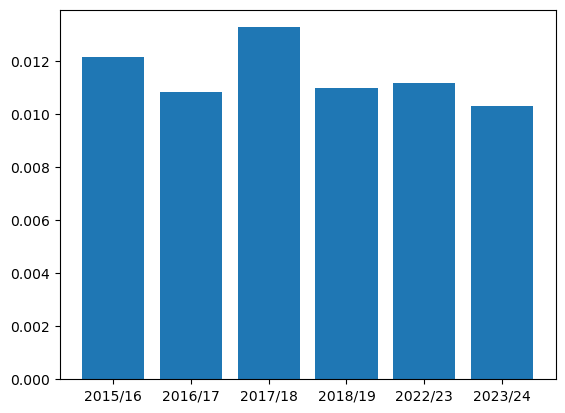

In [30]:
plt.bar(cancellations_england["Year"], cancellations_england["Cancelled operations as percentage of elective admissions"])

<BarContainer object of 66 artists>

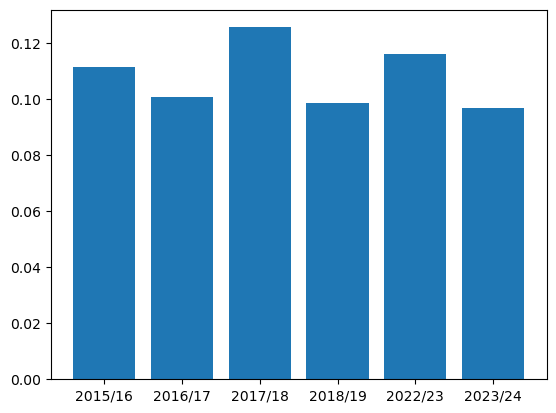

In [31]:
plt.bar(cancellations_scotland["Year"], cancellations_scotland["TotalCancelled"]/cancellations_scotland["TotalOperations"])

<Axes: xlabel='Year', ylabel='Percentage of Cancellations'>

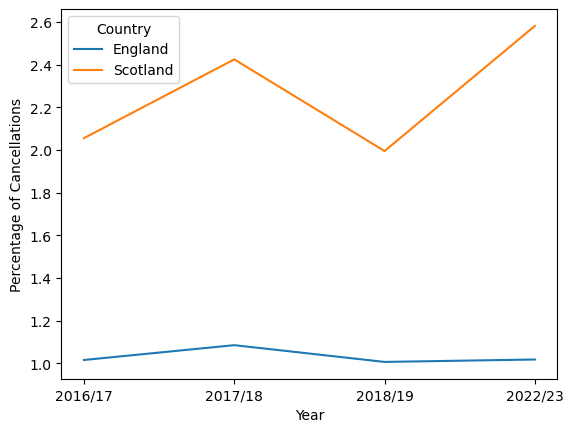

In [32]:
sns.lineplot(data=concatenated, x="Year", y="Percentage of Cancellations", hue="Country")

<Axes: xlabel='Year', ylabel='Count'>

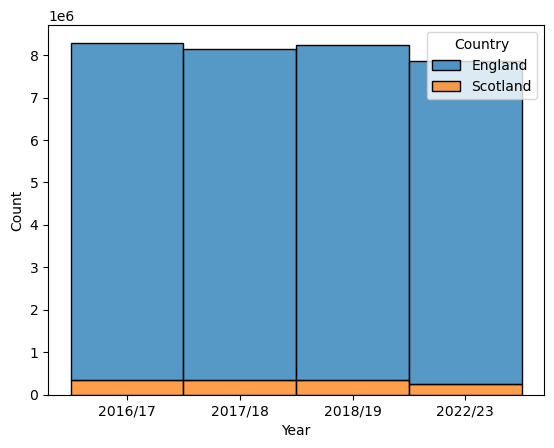

In [33]:
sns.histplot(
    data=concatenated,
    multiple="stack",
    x="Year",
    weights="TotalOperations", 
    hue="Country")

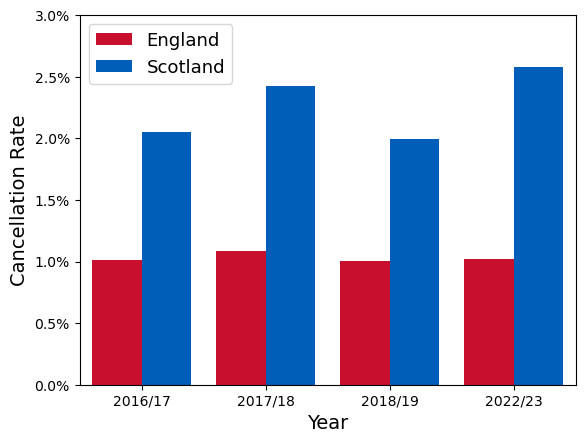

In [34]:
fig, ax = plt.subplots()
sns.barplot(
    data=concatenated,
    x="Year",
    y= "Percentage of Cancellations", 
    hue="Country",
    palette=['#C8102E', '#005EB8'],
    saturation=1)

fmt = '%.1f%%' # Format you want the ticks, e.g. '40%'
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)
ax.set_ylabel("Cancellation Rate")
ax.set_ylim([0, 3])
plt.xlabel("Year", fontsize=14)
plt.ylabel("Cancellation Rate", fontsize=14)
plt.legend(loc='best', fontsize=13, markerscale=1.1)

plt.savefig('figure6.pdf')

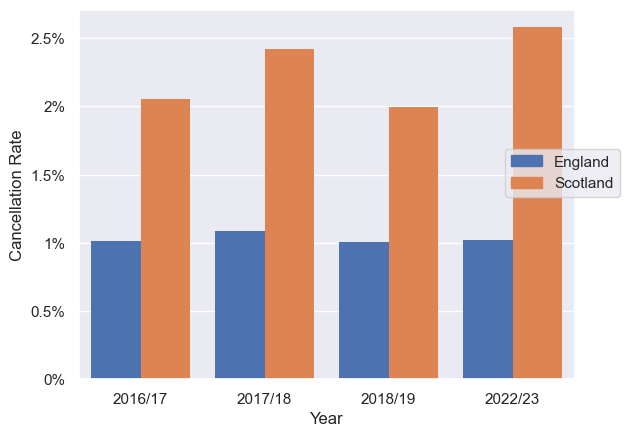

In [35]:
f = plt.figure()
p = so.Plot(concatenated, "Year","Percentage of Cancellations" ,color="Country").add(so.Bar(alpha=1), so.Dodge()).label(x="Year", y="Cancellation Rate", color="").scale(
        y=so.Continuous().label(like="{x:g}%")).on(f).show()

f.savefig("figure6a.pdf", bbox_inches="tight")

In [36]:
so.Plot(concatenated, x="Year", alpha="dataset").add(so.Bars(), so.Hist(binwidth=10), so.Stack())

ValueError: Could not interpret value `dataset` for `alpha`. An entry with this name does not appear in `data`.